# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data from SQL Database

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r'C:\Users\vinay\Projects\P-1_Password_Strength/password_data.sqlite')  # connecting with sqlite DB

In [4]:
data = pd.read_sql_query("SELECT  * FROM Users", con)

In [5]:
data.head()

index                 password  strength
0      0                zxe870819         1
1      1             xw46454nr23l         1
2      2                soporte13         1
3      3  accounts6000webhost.com         2
4      4                 c443balg         1

## Data Cleaning

In [6]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [7]:
data.drop(['index'], axis=1, inplace=True)    #removing unwanted columns

In [8]:
data.duplicated()   #checking for duplicatesdata.duplicated()   #checking for duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [9]:
data.isnull().any()          # checking for missing values

password    False
strength    False
dtype: bool

In [10]:
data.dtypes    # checking data types of columns data

password    object
strength     int64
dtype: object

In [11]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

## Performing Semantic Analysis

In [12]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [13]:
data[data["password"].str.isnumeric()].shape   # no.of people having password consists of numbers only

(26, 2)

In [14]:
data[data["password"].str.isalpha()].shape   # no.of people having password consists of alphabets letters only

(50, 2)

In [15]:
data[data["password"].str.isupper()].shape   # no.of people having password consists of uppercase letters only

(1506, 2)

In [16]:
data[data["password"].str.islower()].shape   # no.of people having password consists of lowercase letters only

(86678, 2)

In [17]:
data[data["password"].str.isalnum()].shape   # no.of people having password consists of alphanuymeric letters only

(97203, 2)

In [18]:
data[data["password"].str.istitle()].shape   # no.of people having password consists of starting letter as capital 

(932, 2)

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [21]:
data["password"].apply(find_semantics)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [22]:
data[data["password"].apply(find_semantics)==1]

password  strength
3      accounts6000webhost.com         2
68                12463773800+         1
98                  p.r.c.d.g.         1
145                  cita-cita         1
180         karolina.susnina0U         2
...                        ...       ...
99748             maiselis.com         1
99845          hosting4meze!@#         2
99954         semista_bakung15         2
99980         halflife2010!LEB         2
99988                lbhtrnjh@         1

[2663 rows x 2 columns]

In [23]:
data["length"] = data["password"].str.len()
data

password  strength  length
0                    zxe870819         1       9
1                 xw46454nr23l         1      12
2                    soporte13         1       9
3      accounts6000webhost.com         2      23
4                     c443balg         1       8
...                        ...       ...     ...
99995               obejofi215         1      10
99996               fmiopvxb64         1      10
99997                czvrbun38         1       9
99998                mymyxe430         1       9
99999              glqjhkxb467         1      11

[100000 rows x 3 columns]

In [24]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [25]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [26]:
def freq_numeric(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [27]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase), 2)

In [28]:
data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase), 2)

In [29]:
data["digit_freq"] = np.round(data["password"].apply(freq_numeric), 2)

In [30]:
def freq_special_char(row):
    for char in row:
        special_chars=[]
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [31]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_char), 3)

In [32]:
data["special_char_freq"] = data["special_char_freq"]/data["length"]
data.head(3)

password  strength  length  lowercase_freq  uppercase_freq  digit_freq  \
0     zxe870819         1       9            0.33             0.0        0.67   
1  xw46454nr23l         1      12            0.42             0.0        0.58   
2     soporte13         1       9            0.78             0.0        0.22   

   special_char_freq  
0                0.0  
1                0.0  
2                0.0

## Performing Descriptive Statistics

In [33]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [34]:
data[['length','strength']].groupby(['strength']).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [35]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for columns in cols:
    print(data[[columns, 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"]))
    print('\n')

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


         lowercase_freq                       
                    min   max      mean median
strength                                      
0                   0.0  1.00  0.707861   0.71
1                   0.0  0.92  0.630550   0.67
2                   0.0  0.92  0.425160   0.40


         uppercase_freq                       
                    min   max      mean median
strength                                      
0                   0.0  1.00  0.012858   0.00
1                   0.0  0.92  0.007917   0.00
2                   0.0  0.89  0.367897   0.43


         digit_freq                       
                min   max      mean median
strength                                  
0               0.0  1.00  0.275598   0.29
1               0.0  0.9

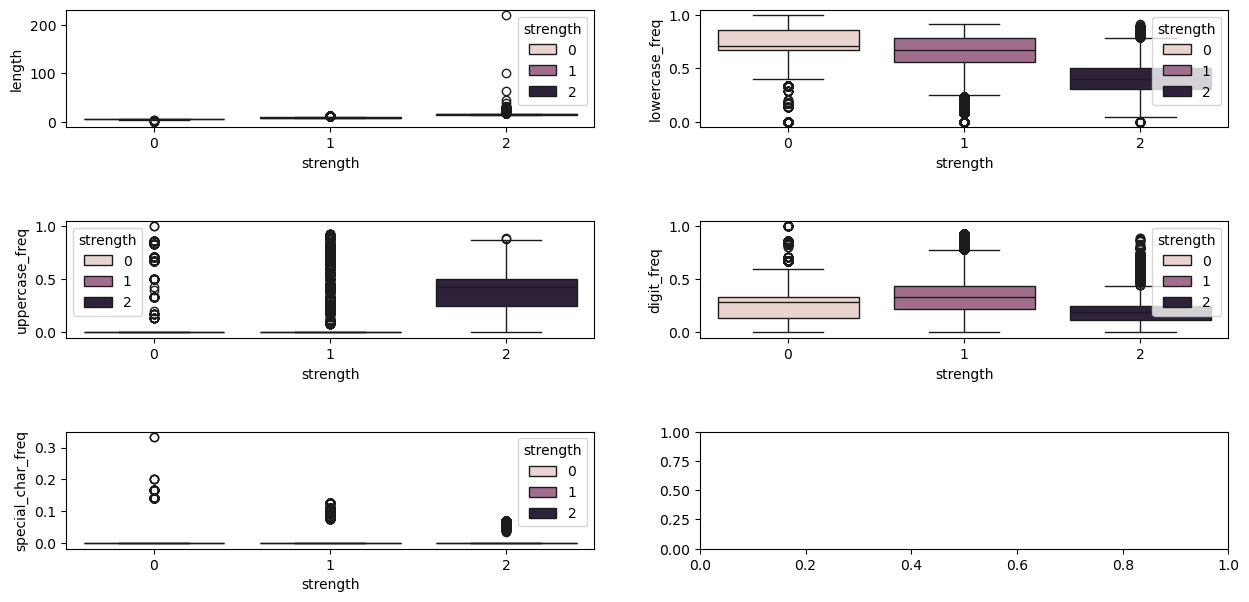

In [36]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(15,7))

sns.boxplot(x = 'strength', y = 'length', hue = 'strength', ax=ax1, data=data)
sns.boxplot(x = 'strength', y = 'lowercase_freq', hue = 'strength', ax=ax2, data=data)
sns.boxplot(x = 'strength', y = 'uppercase_freq', hue = 'strength', ax=ax3, data=data)
sns.boxplot(x = 'strength', y = 'digit_freq', hue = 'strength', ax=ax4, data=data)
sns.boxplot(x = 'strength', y = 'special_char_freq', hue = 'strength', ax=ax5, data=data)
plt.subplots_adjust(hspace=0.8)

## Feature Importance

In [37]:
def get_dist(data,feature):

    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength', y=feature, data = data)

    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature], color='red',label="0", hist=False)
    sns.distplot(data[data['strength']==1][feature], color='blue',label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color='orange',label="2", hist=False)
    plt.legend()
    plt.show()

In [38]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

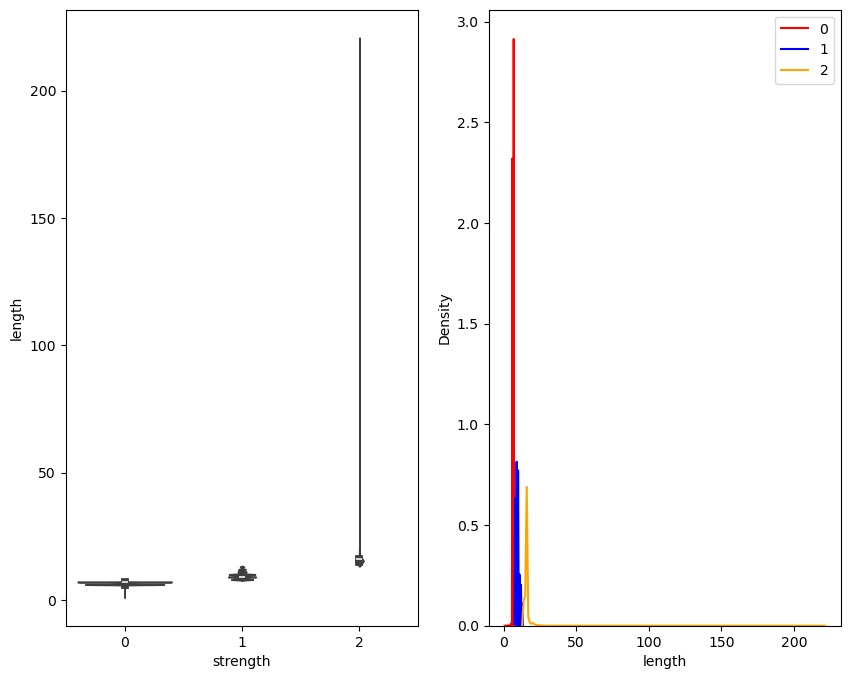

In [39]:
get_dist(data, 'length')

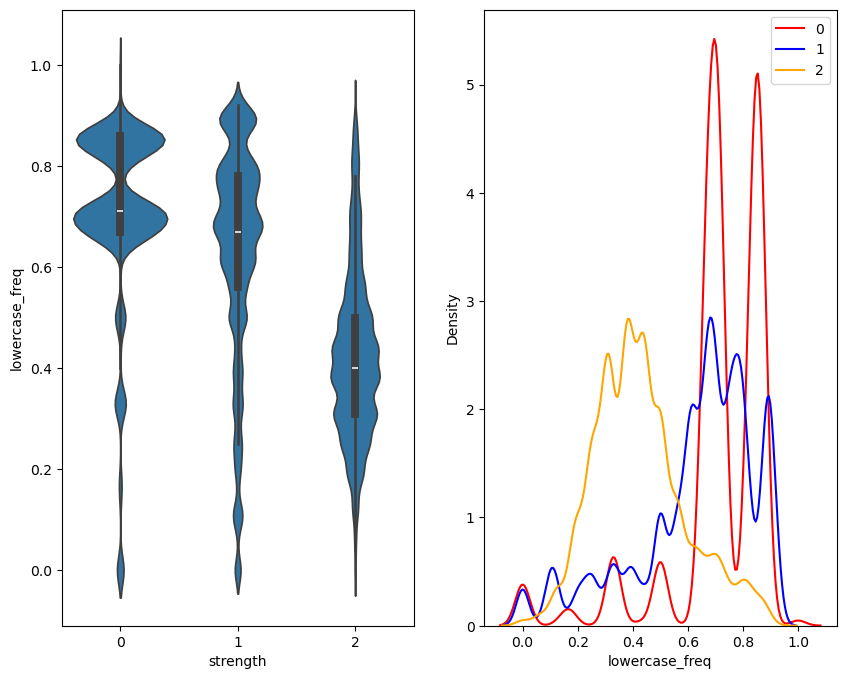

In [40]:
get_dist(data, 'lowercase_freq')

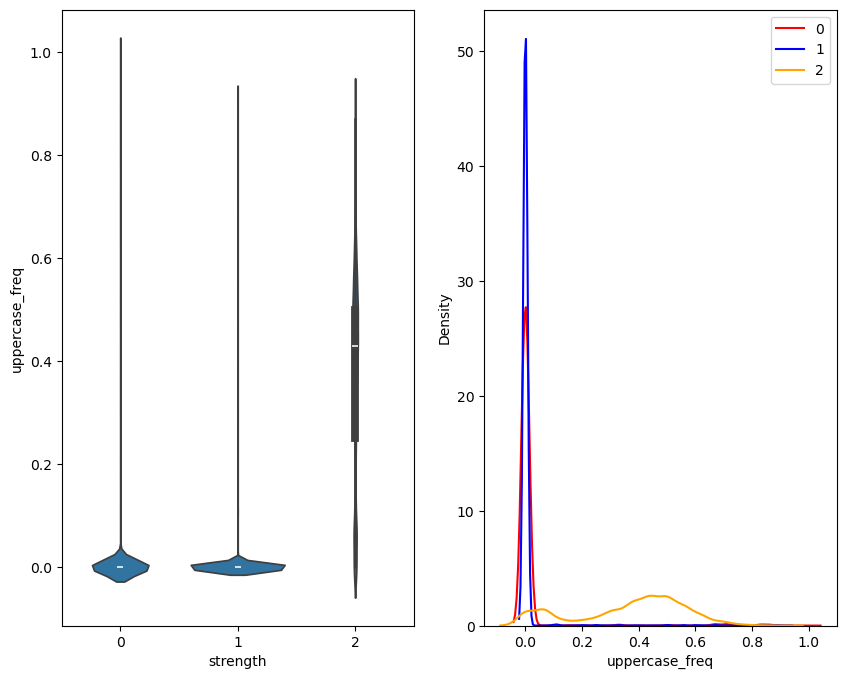

In [41]:
get_dist(data, 'uppercase_freq')

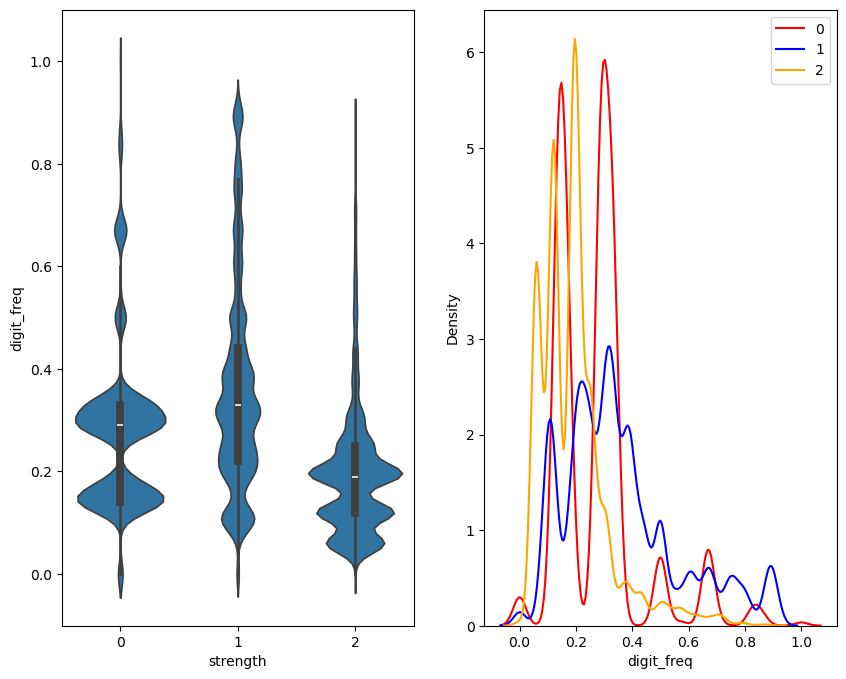

In [42]:
get_dist(data, 'digit_freq')

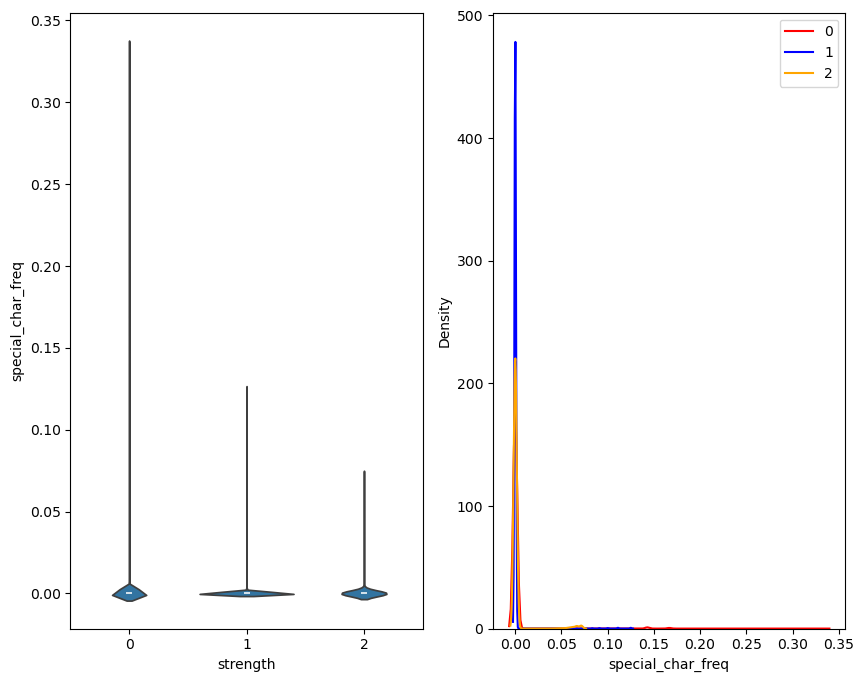

In [43]:
get_dist(data, 'special_char_freq')

## Applying TF_IDF on data

In [44]:
dataframe = data.sample(frac=1)      # to shuffle the data

In [45]:
dataframe

password  strength  length  lowercase_freq  uppercase_freq  \
71240          h1c8h24q         1       8            0.50            0.00   
93210        vqtoan1010         1      10            0.60            0.00   
67525          megaw166         1       8            0.62            0.00   
7070        hardhammer8         1      11            0.91            0.00   
32348        nosaints10         1      10            0.80            0.00   
...                 ...       ...     ...             ...             ...   
53168  dsaTvyTM2OQmyxDN         2      16            0.50            0.44   
19072        j3qq4h7h2w         1      10            0.60            0.00   
76681            jas666         0       6            0.50            0.00   
27646        ggbb112233         1      10            0.40            0.00   
27331         kinni1983         1       9            0.56            0.00   

       digit_freq  special_char_freq  
71240        0.50                0.0  
93210        0.40                0.0  
67525        0.38                0.0  
7070         0.09                0.0  
32348        0.20                0.0  
...           ...                ...  
53168        0.06                0.0  
19072        0.40                0.0  
76681        0.50                0.0  
27646        0.60                0.0  
27331        0.44                0.0  

[100000 rows x 7 columns]

In [46]:
x = list(dataframe['password'])

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vectorizer = TfidfVectorizer(analyzer="char")

In [49]:
X = vectorizer.fit_transform(x)

In [50]:
X.shape

(100000, 99)

In [51]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21420018, 0.24781923, 0.        , 0.3064636 ,
       0.        , 0.        , 0.        , 0.31357401, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.32310378,
       0.        , 0.        , 0.        , 0.        , 0.66587726,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.39072591, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [54]:
len(vectorizer.get_feature_names_out())

99

In [55]:
df2 = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
df2

                                 !    #  ...    ñ    ó    õ  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         ö    ÷    ú    ü    ý    þ    ›  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[100000 rows x 99 columns]

## Apply ML Algorithm

In [56]:
df2["length"] = dataframe["length"]
df2["lowercase_freq"] = dataframe["lowercase_freq"]
df2

                                 !    #  ...    õ    ö    ÷  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         ú    ü    ý    þ    ›  length  lowercase_freq  
0      0.0  0.0  0.0  0.0  0.0       9            0.33  
1      0.0  0.0  0.0  0.0  0.0      12            0.42  
2      0.0  0.0  0.0  0.0  0.0       9            0.78  
3      0.0  0.0  0.0  0.0  0.0      23            0.78  
4      0.0  0.0  0.0  0.0  0.0       8            0.62  
...    ...  ...  ...  ...  ...     ...             ...  
99995  0.0  0.0  0.0  0.0  0.0      10            0.70  
99996  0.0  0.0  0.0  0.0  0.0      10            0.80  
99997  0.0  0.0  0.0  0.0  0.0       9            0.78  
99998  0.0  0.0  0.0  0.0  0.0       9            0.67  
99999  0.0  0.0  0.0  0.0  0.0      11            0.73  

[100000 rows x 101 columns]

In [57]:
y = dataframe["strength"]

### Split data for Training and Testing

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, train_size=0.8)

In [60]:
X_train.shape

(80000, 101)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
reg = LogisticRegression(multi_class = "multinomial")

In [63]:
reg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [64]:
y_predict = reg.predict(X_test)

In [65]:
from collections import Counter

In [66]:
Counter(y_predict)

Counter({1: 16639, 2: 1973, 0: 1388})

In [88]:
password = "%@123abcdef"

In [89]:
sample_array = np.array([password])

In [90]:
sample_array.shape

(1,)

In [91]:
sample_matrix = vectorizer.transform(sample_array)

In [92]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.68867705, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13740016, 0.15896533, 0.17804186, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.46687214, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13232129, 0.22182066, 0.20725712,
        0.19930316, 0.15500858, 0.24184373, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [93]:
sample_matrix.toarray().shape

(1, 99)

In [94]:
len(password)

11

In [95]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd', 'e', 'f']

In [96]:
len([char for char in password if char.islower()])/len(password)

0.5454545454545454

In [97]:
np.append(sample_matrix.toarray(), (9,0.4444)).shape

(101,)

In [98]:
new_matrix = np.append(sample_matrix.toarray(), (9,0.4444)).reshape(1,101)
new_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.68867705, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13740016, 0.15896533, 0.17804186, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.46687214, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13232129, 0.22182066, 0.20725712,
        0.19930316, 0.15500858, 0.24184373, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [99]:
reg.predict(new_matrix)

array([0], dtype=int64)

In [100]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_password = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    matrix = np.append(sample_matrix.toarray() , (length_password , length_normalised_lowercase)).reshape(1,101)
    result = reg.predict(matrix)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    elif result==2:
        return "password is strong"

In [101]:
predict()

Enter a password :  vectorizer


'Password is normal'

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [103]:
accuracy_score(y_test,y_predict)

0.794

In [104]:
confusion_matrix(y_test,y_predict)

array([[  700,  2016,     8],
       [  599, 13682,   467],
       [   89,   941,  1498]], dtype=int64)

In [105]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.26      0.34      2724
           1       0.82      0.93      0.87     14748
           2       0.76      0.59      0.67      2528

    accuracy                           0.79     20000
   macro avg       0.70      0.59      0.63     20000
weighted avg       0.77      0.79      0.77     20000



# Saving the model

In [106]:
import pickle

In [107]:
with open('model', 'wb') as file:
    pickle.dump(reg,file)

In [108]:
with open('scaler', 'wb') as file:
    pickle.dump(vectorizer,file)